In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pyFTS.benchmarks import Measures
import math
from pyFTS.common import Util
import datetime
import statistics

In [5]:
df = pd.read_csv('/home/hugo/projetos-doutorado/Appliance-Energy-Prediction/data/energydata_complete.csv')
data = df.drop(labels=['rv1','rv2'], axis=1)

In [6]:
from pandas.tseries.offsets import BDay
data['Date'] = pd.to_datetime(data['date'])
data.index= data['date']

In [8]:
data.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Date
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,2016-01-11 17:00:00
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,2016-01-11 17:10:00


Text(0.5, 1.0, 'Appliances Energy Consumption')

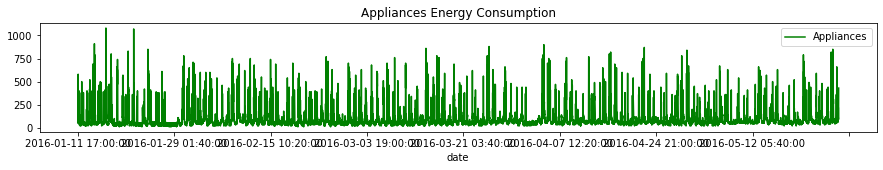

In [10]:
data['Appliances'].plot(color='green', figsize=(15,2))
plt.legend([ 'Appliances'])
plt.title("Appliances Energy Consumption")

In [20]:
# Variables
#endog = data['Appliances']
#exog = data.loc[:,'Appliances':'Tdewpoint']

In [32]:
# from sklearn.preprocessing import MinMaxScaler
# sc_in = MinMaxScaler(feature_range=(0, 1))
# scaled_input = sc_in.fit_transform(data.loc[:,'Appliances':'Tdewpoint'])
# scaled_input = pd.DataFrame(scaled_input)


In [27]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Date'],
      dtype='object')

<ipython-input-33-88a2b1f4ecf5>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seas_d=sm.tsa.seasonal_decompose(data['Appliances'],model='add',freq=365);


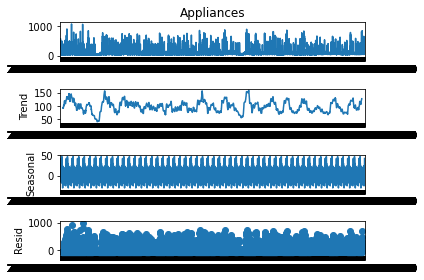

In [33]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(data['Appliances'],model='add',freq=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [35]:
#Variables
endog = data['Appliances']
exog = data.loc[:,'Appliances':'Tdewpoint']

In [37]:
train_size=int(len(data) *0.75)
test_size = int(len(data)) - train_size
print(test_size)

4934


In [38]:
train_X, train_y = exog[:train_size].dropna(), endog[:train_size].dropna()
test_X, test_y = exog[train_size:].dropna(), endog[train_size:].dropna()

In [39]:
test_X.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'],
      dtype='object')

In [40]:
y_test=endog[:train_size].dropna()

In [41]:
type(y_test)

pandas.core.series.Series

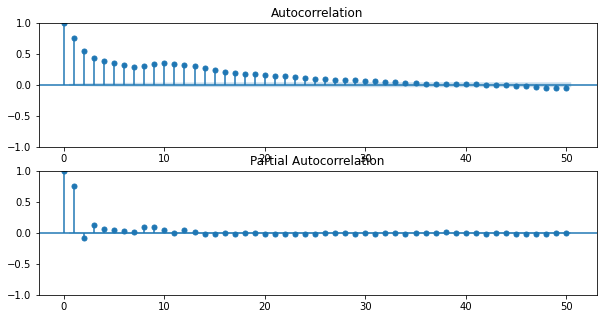

In [42]:
#Correlograms
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [43]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
                     exogenous= train_X,
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-313500.973, Time=50.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-313504.825, Time=40.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-313502.943, Time=41.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-313503.019, Time=49.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-313506.825, Time=40.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 221.856 seconds


In [44]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                14801
Model:               SARIMAX(0, 1, 0)   Log Likelihood              156780.413
Date:                Wed, 09 Jun 2021   AIC                        -313506.825
Time:                        00:06:37   BIC                        -313301.561
Sample:                    01-11-2016   HQIC                       -313438.677
                         - 04-23-2016                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Appliances      1.0000   8.21e-22   1.22e+21      0.000       1.000       1.000
lights       9.905e-16   1.25e-23   7.92e+07      0.000    9.91e-16    9.91e-16
T1          -1.021e-14   3.13e-26  -3.26e+11      0.000   -1.02e-14   -1.02e-14
RH_1         6.661e-15   7.35e-25   9.06e+09      0.000    6.66e-15    6.66e-15
T2           5.773e-15   2.01e-26   2.87e+11      0.000    5.77e-15    5.77e-15
RH_2        -5.995e-15   2.47e-25  -2.43e+10      0.000      -6e-15      -6e-15
T3           4.441e-16   8.65e-26   5.13e+09      0.000    4.44e-16    4.44e-16
RH_3         2.054e-15   2.19e-25   9.38e+09      0.000    2.05e-15    2.05e-15
T4          -6.217e-15   6.85e-26  -9.08e+10      0.000   -6.22e-15   -6.22e-15
RH_4         8.049e-15    8.3e-26   9.69e+10      0.000    8.05e-15    8.05e-15
T5          -1.021e-14   8.86e-27  -1.15e+12      0.000   -1.02e-14   -1.02e-14
RH_5         1.527e-16   9.04e-26   1.69e+09      0.000    1.53e-16    1.53e-16
T6           5.329e-15   4.04e-26   1.32e+11      0.000    5.33e-15    5.33e-15
RH_6         1.277e-15   9.02e-25   1.42e+09      0.000    1.28e-15    1.28e-15
T7          -4.441e-15   7.25e-27  -6.13e+11      0.000   -4.44e-15   -4.44e-15
RH_7         1.232e-14   1.32e-25   9.37e+10      0.000    1.23e-14    1.23e-14
T8          -6.661e-16   5.81e-27  -1.15e+11      0.000   -6.66e-16   -6.66e-16
RH_8          1.11e-16    1.3e-25   8.54e+08      0.000    1.11e-16    1.11e-16
T9           2.665e-15   3.81e-27   6.99e+11      0.000    2.66e-15    2.66e-15
RH_9        -4.441e-15   5.64e-26  -7.87e+10      0.000   -4.44e-15   -4.44e-15
T_out       -2.798e-14   5.62e-26  -4.97e+11      0.000    -2.8e-14    -2.8e-14
Press_mm_hg -3.886e-15    1.7e-27  -2.29e+12      0.000   -3.89e-15   -3.89e-15
RH_out       -3.83e-15   2.87e-25  -1.33e+10      0.000   -3.83e-15   -3.83e-15
Windspeed   -8.493e-15      1e-25  -8.46e+10      0.000   -8.49e-15   -8.49e-15
Visibility   3.816e-16   6.83e-25   5.59e+08      0.000    3.82e-16    3.82e-16
Tdewpoint    1.421e-14   9.43e-27   1.51e+12      0.000    1.42e-14    1.42e-14
sigma2           1e-10   1.63e-11      6.138      0.000    6.81e-11    1.32e-10
===================================================================================
Ljung-Box (L1) (Q):                 493.62   Jarque-Bera (JB):            440005.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.87
Prob(H) (two-sided):                  0.02   Kurtosis:                        29.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.95e+48. Standard errors may be unstable.
"""

In [2]:
train_X

NameError: name 'train_X' is not defined

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
           exog=train_X,
              order=(0,1,1),
              enforce_invertibility=False, enforce_stationarity=False)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'


In [57]:
steps=-1


In [58]:
results= model.fit()

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
test_X

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-04-23 11:50:00,280,0,22.390000,37.930000,22.390000,35.400000,24.430000,35.723333,22.5,34.790000,...,23.456000,38.378000,20.79,39.296667,8.450000,756.933333,62.833333,5.166667,40.000000,1.716667
2016-04-23 12:00:00,320,0,22.390000,37.863333,22.356667,35.290000,24.860000,36.133333,22.5,34.700000,...,23.500000,38.264286,20.79,38.963333,8.500000,757.000000,62.000000,5.000000,40.000000,1.600000
2016-04-23 12:10:00,360,0,22.390000,37.790000,22.290000,35.290000,25.172500,36.675000,22.5,34.700000,...,23.500000,38.090000,20.79,38.826667,8.500000,757.000000,61.666667,5.000000,40.000000,1.516667
2016-04-23 12:20:00,210,0,22.390000,37.790000,22.230000,35.200000,25.430000,36.900000,22.5,34.700000,...,23.557143,37.998571,20.79,38.966667,8.500000,757.000000,61.333333,5.000000,40.000000,1.433333
2016-04-23 12:30:00,90,0,22.426667,39.100000,22.290000,35.460000,25.633333,36.900000,22.5,34.700000,...,23.600000,37.860000,20.79,39.000000,8.500000,757.000000,61.000000,5.000000,40.000000,1.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,24.700000,50.074000,23.20,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,24.700000,49.790000,23.20,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,24.700000,49.660000,23.20,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667


In [60]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4934 entries, 2016-04-23 11:50:00 to 2016-05-27 18:00:00
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   4934 non-null   int64  
 1   lights       4934 non-null   int64  
 2   T1           4934 non-null   float64
 3   RH_1         4934 non-null   float64
 4   T2           4934 non-null   float64
 5   RH_2         4934 non-null   float64
 6   T3           4934 non-null   float64
 7   RH_3         4934 non-null   float64
 8   T4           4934 non-null   float64
 9   RH_4         4934 non-null   float64
 10  T5           4934 non-null   float64
 11  RH_5         4934 non-null   float64
 12  T6           4934 non-null   float64
 13  RH_6         4934 non-null   float64
 14  T7           4934 non-null   float64
 15  RH_7         4934 non-null   float64
 16  T8           4934 non-null   float64
 17  RH_8         4934 non-null   float64
 18  T9           4934 no

In [61]:
train_X

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-23 11:00:00,370,0,22.200000,37.656667,22.356667,35.490000,23.790000,35.163333,22.426667,35.126667,...,23.277143,38.981429,20.790000,39.700000,8.200000,756.600000,67.000000,6.000000,40.000000,2.300000
2016-04-23 11:10:00,400,0,22.290000,37.800000,22.290000,35.230000,23.790000,35.163333,22.500000,35.060000,...,23.290000,38.878000,20.790000,39.700000,8.250000,756.666667,66.166667,5.833333,40.000000,2.183333
2016-04-23 11:20:00,300,10,22.290000,38.193333,22.200000,35.230000,23.823333,35.266667,22.472500,34.947500,...,23.290000,38.725714,20.790000,39.566667,8.300000,756.733333,65.333333,5.666667,40.000000,2.066667


In [62]:
step_wise=auto_arima(train_y, 
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=167618.507, Time=11.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=169549.487, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=169504.908, Time=0.74 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=169458.469, Time=4.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=169547.487, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=167290.879, Time=10.99 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=168647.145, Time=1.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=167264.795, Time=19.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=168340.539, Time=2.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=167266.506, Time=25.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=167266.547, Time=33.54 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=167265.555, Time=21.27 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=168119.282, Time=3.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=167263.306, Time=47.32 se

In [63]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                14801
Model:               SARIMAX(7, 1, 3)   Log Likelihood              -83563.045
Date:                Wed, 09 Jun 2021   AIC                         167148.090
Time:                        00:40:32   BIC                         167231.716
Sample:                             0   HQIC                        167175.854
                              - 14801                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7858      0.055     14.223      0.000       0.678       0.894
ar.L2         -0.7537      0.070    -10.771      0.000      -0.891      -0.617
ar.L3          0.3466      0.041      8.513      0.000       0.267       0.426
ar.L4         -0.1237      0.012    -10.160      0.000      -0.148      -0.100
ar.L5         -0.0002      0.010     -0.018      0.986      -0.020       0.020
ar.L6         -0.0218      0.008     -2.630      0.009      -0.038      -0.006
ar.L7         -0.0848      0.008     -9.979      0.000      -0.101      -0.068
ma.L1         -0.9741      0.055    -17.627      0.000      -1.082      -0.866
ma.L2          0.5803      0.079      7.387      0.000       0.426       0.734
ma.L3         -0.3805      0.042     -8.991      0.000      -0.463      -0.298
sigma2      4710.1276     17.636    267.078      0.000    4675.562    4744.693
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            257324.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             2.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
model= SARIMAX(train_y,            
              order=(2,1,0),
              enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
forecast = results.forecast(steps=2)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'


In [67]:
a=train_size+test_size-(steps)-train_size
steps

-1

In [1]:
model= SARIMAX(train_y, 
               exog=train_X,            
              order=(0,1,1),
              enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)
print(len(predictions))

NameError: name 'SARIMAX' is not defined

In [ ]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

In [ ]:
forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=test_X.index
forecast_apple['Actual'] =exog.iloc[train_size:, 0]
forecast_apple.rename(columns={0:'Forecast'}, inplace=True)

In [ ]:
forecast_apple